In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from my_dataset.dataloader import BrainDataModule, BrainDataset
from my_utilities.data_dir_helper import generate_processed_data_dirs

In [2]:
generate_processed_data_dirs(
    preprocessed_path='D:\\333_workspace\\deeplearning\\unet\\A_BrainSeg\\data', 
    check_sync=True, 
    output_name='win_stacked_img_msk_data_dirs'
)

In [25]:
data_path = np.load('win_stacked_img_msk_data_dirs.npy', allow_pickle=True)
data_path.shape

(29541, 2)

In [26]:
dataset = BrainDataset(data_path[:,0], data_path[:,1])

In [27]:
img, msk = next(iter(dataset))

In [64]:
import math
import random

index = math.floor(random.random() * (len(dataset) - 1))
img, msk = dataset[index]

In [29]:
len(dataset)

29541

In [30]:
print(img.shape)
print(msk.shape)

torch.Size([4, 192, 192])
torch.Size([4, 192, 192])


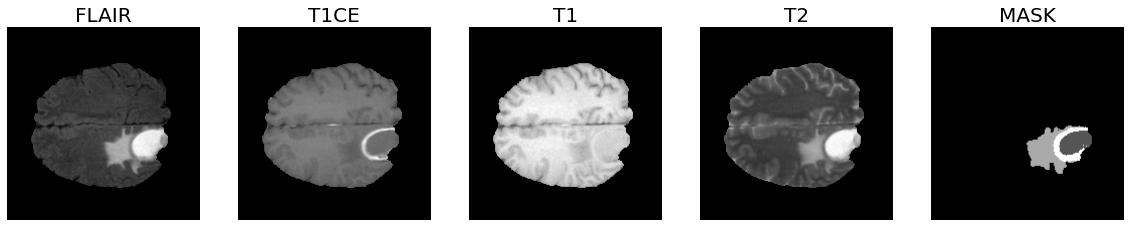

In [86]:
titles = ('flair', 't1ce', 't1', 't2')
fig, axis = plt.subplots(nrows=1, ncols=5, figsize=(20,10))

for i, ax in enumerate(axis):
    ax.axis('off')
    if i < 4:
        ax.imshow(img[i, ...], cmap='gray')
        ax.set_title(titles[i].upper(), fontsize=20)
    else:
        ax.imshow(msk.argmax(dim=0), cmap='gray')
        ax.set_title('mask'.upper(), fontsize=20)

In [2]:
az1 = np.load('metric_collection_5_fold_k_1_TPR_E_UNET.npy', allow_pickle=True)
az2 = np.load('metric_collection_5_fold_k_1_TPR_D_UNET.npy', allow_pickle=True)
az3 = np.load('metric_collection_5_fold_k_1_TPR_ED_UNET.npy', allow_pickle=True)

az3_2 = np.load('metric_collection_5_fold_k_1_TPR_ED_UNET_2_2_double.npy', allow_pickle=True)

az_unet = np.load('metric_collection_5_fold_k_5_UNET.npy', allow_pickle=True)


In [3]:
az1_dice = list(map(lambda x: x['val_loss'].cpu().item(), az1))
az1_iou = list(map(lambda x: x['loss_IoU_val'].cpu().item(), az1))
az1_focal = list(map(lambda x: x['loss_Focal_val'].cpu().item(), az1))

az2_dice = list(map(lambda x: x['val_loss'].cpu().item(), az2))
az2_iou = list(map(lambda x: x['loss_IoU_val'].cpu().item(), az2))
az2_focal = list(map(lambda x: x['loss_Focal_val'].cpu().item(), az2))

az3_dice = list(map(lambda x: x['val_loss'].cpu().item(), az3))
az3_iou = list(map(lambda x: x['loss_IoU_val'].cpu().item(), az3))
az3_focal = list(map(lambda x: x['loss_Focal_val'].cpu().item(), az3))

az3_2_dice = list(map(lambda x: x['val_loss'].cpu().item(), az3_2))
az3_2_iou = list(map(lambda x: x['loss_IoU_val'].cpu().item(), az3_2))
az3_2_focal = list(map(lambda x: x['loss_Focal_val'].cpu().item(), az3_2))

az_unet_dice = list(map(lambda x: x['val_loss'].cpu().item(), az_unet))
az_unet_iou = list(map(lambda x: x['loss_IoU_val'].cpu().item(), az_unet))
az_unet_focal = list(map(lambda x: x['loss_Focal_val'].cpu().item(), az_unet))


In [4]:
print(f"az1_dice     : {round((1-az1_dice[-1])*100,2)}\t\taz1_iou\t   : {round((1-az1_iou[-1])*100,2)}\t\taz1_focal\t: {round((1-az1_focal[-1])*100,2)}")
print(f"az2_dice     : {round((1-az2_dice[-1])*100,2)}\t\taz2_iou\t   : {round((1-az2_iou[-1])*100,2)}\t\taz1_focal\t: {round((1-az2_focal[-1])*100,2)}")
print(f"az3_dice     : {round((1-az3_dice[-1])*100,2)}\t\taz3_iou\t   : {round((1-az3_iou[-1])*100,2)}\t\taz1_focal\t: {round((1-az3_focal[-1])*100,2)}")
print(f"az3_2_dice     : {round((1-az3_2_dice[-1])*100,2)}\t\taz3_iou\t   : {round((1-az3_2_iou[-1])*100,2)}\t\taz1_focal\t: {round((1-az3_2_focal[-1])*100,2)}")

print(f"az_unet_dice : {round((1-az_unet_dice[-1])*100,2)}\t\taz_unet_iou: {round((1-az_unet_iou[-1])*100,2)}\t\taz_unet_focal  \t: {round((1-az_unet_focal[-1])*100,2)}")

az1_dice     : 91.08		az1_iou	   : 84.83		az1_focal	: 55.29
az2_dice     : 90.64		az2_iou	   : 84.25		az1_focal	: 55.29
az3_dice     : 90.48		az3_iou	   : 83.92		az1_focal	: 55.28
az3_2_dice     : 94.1		az3_iou	   : 89.21		az1_focal	: 55.28
az_unet_dice : 90.76		az_unet_iou: 84.25		az_unet_focal  	: 55.29


In [55]:
score1 = np.load('score_5_fold_TPR_E_UNET.npy', allow_pickle=True)
score2 = np.load('score_5_fold_TPR_D_UNET.npy', allow_pickle=True)
score3 = np.load('score_5_fold_TPR_ED_UNET.npy', allow_pickle=True)
score_unet = np.load('score_5_fold_UNET.npy', allow_pickle=True)

print(f"score1_dice     : {score1}")
print(f"score2_dice     : {score2}")
print(f"score3_dice     : {score3}")
print(f"score_unet_dice : {score_unet}")

score1_dice     : 91.08
score2_dice     : 90.64
score3_dice     : 90.48
score_unet_dice : 90.58
